The best converting page on your site is /TMRW_Get_in_touch.php with conversion rate 75.0%


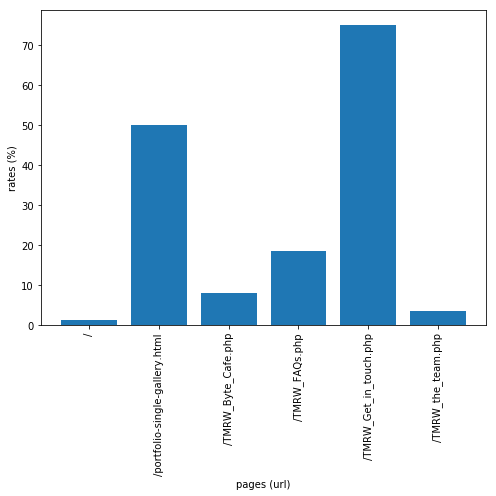

In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.json import json_normalize

#gc = pandas.read_csv('Goal1CompletionLocation_Goal1Completions.csv')
#pgs = pandas.read_csv('Sessions_Page.csv')
#print(gc)
#print(pgs)

gc__json = pandas.read_json('task_data/Goal1CompletionLocation_Goal1Completions.json')['reports'][0]['data']['rows']
gc_urls = json_normalize(gc__json, 'dimensions')
gc_urls = gc_urls[0][list(range(1,gc_urls.shape[0]))] #deliting the entrance
gcs = json_normalize(gc__json, ['metrics','values'])
gcs = gcs[0][list(range(1,gcs.shape[0]))]

pages_json = pandas.read_json('task_data/Sessions_Page.json')['reports'][0]['data']['rows']
pages_sessions = json_normalize(pages_json, ['metrics','values'])
pages_sessions.index = list(json_normalize(pages_json, 'dimensions')[0])
pages_sessions = pages_sessions[pages_sessions.notnull()] #delleting nulls
selected_pages_sesions = pages_sessions[0][list(gc_urls)]

rate = 100.*np.array(pandas.to_numeric(gcs))/np.array(pandas.to_numeric(selected_pages_sesions))

answerFrame = pandas.DataFrame()
answerFrame['urls'] = gc_urls
answerFrame['rate'] = rate

# Target string:
print('The best converting page on your site is {} with conversion rate {}%'
      .format(str(answerFrame['urls'][answerFrame['rate']==np.max(answerFrame['rate'])].values[0]),str(np.max(answerFrame['rate']))))
#Target bar chart
figure = plt.figure('Target Bar chart', figsize=(7,7))
plt.bar(range(0,answerFrame.shape[0]), answerFrame['rate'], align='center')
plt.xticks(range(0,answerFrame.shape[0]), answerFrame['urls'], rotation = 90)
plt.xlabel('pages (url)')
plt.ylabel('rates (%)')
figure.tight_layout()
plt.show()